In [1]:
import graphviz as gv

In [2]:
%%file n_cores.in
1 2
0 2 5
0 1 3 4 5 6
2 4 6 7
2 3 6 7
1 2 6 8
2 3 4 5 7 8
3 4 6
5 6

Overwriting n_cores.in


In [3]:
def drawGraph(G, path = [],directed =  False):
    g = gv.Digraph("nombre") if directed else gv.Graph("nombre")
    n = len(G)

    done = set()
    for v, u in enumerate(path):
        if u != -1:
            g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
            done.add((u, v))
            done.add((v, u))
    for u in range(n):
        g.node(str(u))
        for v in G[u]:
            if not (u, v) in done:
                done.add((u, v))
                done.add((v, u))
                g.edge(str(u), str(v))

    return g

[[1, 2], [0, 2, 5], [0, 1, 3, 4, 5, 6], [2, 4, 6, 7], [2, 3, 6, 7], [1, 2, 6, 8], [2, 3, 4, 5, 7, 8], [3, 4, 6], [5, 6]]


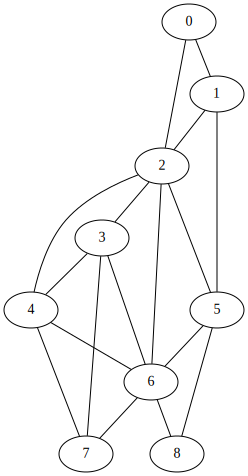

In [4]:
with open("n_cores.in") as f:
    G = []
    for line in f:
        G.append([int(x) for x in line.split()])
print(G)
drawGraph(G)

In [5]:
n = len(G)
for u in range(n):
    print(f"Vertex {u} has grade {len(G[u])}")

Vertex 0 has grade 2
Vertex 1 has grade 3
Vertex 2 has grade 6
Vertex 3 has grade 4
Vertex 4 has grade 4
Vertex 5 has grade 4
Vertex 6 has grade 6
Vertex 7 has grade 3
Vertex 8 has grade 2


### Algoritmo por fuerza bruta para resolver el problema

In [6]:
def k_core_FB(G,k):
    n = len(G)
    while True:
        grades = [0]*n
        for u in range(n):
            grades[u] = len(G[u])
        vertices = []
        for u, grade in enumerate(grades):
            if grade != 0 and grade < k:
                vertices.append(u)
        if len(vertices) == 0:
            break
        for x in vertices:
            G[x] = []
            for y in range(n):
                if x in G[y]:
                    G[y].remove(x)


### Algoritmo por una variacion de DFS  resolver el problema

#### Funcion para hallar los grados de cada nodo

In [7]:
def calculate_grade(G):
    grades = [0]*n
    for u in range(n):
        grades[u] = len(G[u])
    return grades

#### Funcion siguiendo el concepto de DFS

In [8]:
def k_core(G,k,inicio):
    visit = [] # Lista para verificar nodos visitados
    eliminate = [] # Lista para verificar nodos eliminados

    def dfs_core(pos, visited, eliminated): # La sub_funcion recibe la (posicion, lista de nodos visitados, lista de nodos eliminados)
            grades = calculate_grade(G)
            # IF que verifica la posicion no es una ya visitada
            if pos not in visited:
                visited.append(pos)
            # FOR para recorrer los nodos relacionados a ese nodo
            for i in G[pos]:
                # IF que verifica que el nodo no esta ya eliminado por una iteracion previa, en caso lo este, sera eliminado de la lista
                if i in eliminated:
                    G[pos].remove(i)
                    ## IF que verifica si el nodo padre esta en visitados, este sera eliminado de visitados ---> ya que necesita
                    ## ser revisado nuevamente debido a los cambios realizado
                    if pos in visited:
                        visited.remove(pos)
                    # Como se eliminaron nodos, es necesario calcular el grado nuevamente para el IF que sigue en la secuencia
                    grades = calculate_grade(G)
                # IF que verifica que el nodo cumpla con los requisito del grado minimo para no ser eliminado
                if grades[pos] < k and grades[pos] != 0:
                    G[pos] = []
                    ## Al ser eliminado se agrega a lista eliminados para ser posteriormente eliminado en otros nodos
                    if pos not in eliminated:
                        eliminated.append(pos)
                # IF para poder detener la recursividad haciendo de uso a la lista visitados
                # La recursividad se detendra una vez todos los nodos esten visitados ----> es decir ---> Todos los nodos estan verificados
                if i not in visited:
                    # Llama recursivamente a si mismo a los nodos que no esten visitados en esa posicion
                    dfs_core(i, visited, eliminated)
    # Inicio de la funcion recursiva  ----> inicio == Nodo de donde empezara el algoritmo
    dfs_core(inicio, visit, eliminate)
    # Retorna la lista de los nodos eliminados
    return eliminate


#### Funcion para imprimir en lista el grafo

In [9]:
def print_kcores(G):
    for w,i in enumerate(G):
        print(str("\n [ ") + str(w) + str(" ]"), end=" ")
        for j in G[w]:
            print("-> " + str(j), end=" ")

In [10]:
print(G)
print_kcores(G)
eliminates = k_core(G,3,0)

[[1, 2], [0, 2, 5], [0, 1, 3, 4, 5, 6], [2, 4, 6, 7], [2, 3, 6, 7], [1, 2, 6, 8], [2, 3, 4, 5, 7, 8], [3, 4, 6], [5, 6]]

 [ 0 ] -> 1 -> 2 
 [ 1 ] -> 0 -> 2 -> 5 
 [ 2 ] -> 0 -> 1 -> 3 -> 4 -> 5 -> 6 
 [ 3 ] -> 2 -> 4 -> 6 -> 7 
 [ 4 ] -> 2 -> 3 -> 6 -> 7 
 [ 5 ] -> 1 -> 2 -> 6 -> 8 
 [ 6 ] -> 2 -> 3 -> 4 -> 5 -> 7 -> 8 
 [ 7 ] -> 3 -> 4 -> 6 
 [ 8 ] -> 5 -> 6 

[[], [], [3, 4, 5, 6], [2, 4, 6, 7], [2, 3, 6, 7], [], [2, 3, 4, 5, 7], [3, 4, 6], []]
[0, 1, 8, 5]

 [ 0 ] 
 [ 1 ] 
 [ 2 ] -> 3 -> 4 -> 5 -> 6 
 [ 3 ] -> 2 -> 4 -> 6 -> 7 
 [ 4 ] -> 2 -> 3 -> 6 -> 7 
 [ 5 ] 
 [ 6 ] -> 2 -> 3 -> 4 -> 5 -> 7 
 [ 7 ] -> 3 -> 4 -> 6 
 [ 8 ] 

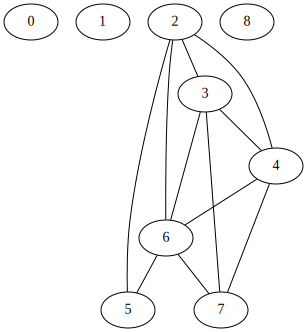

In [11]:
print(G)
print(eliminates)
print_kcores(G)
drawGraph(G)